# **Boston Housing Regression with Keras & TensorFlow**

**Dataset:** Keras Boston Housing dataset - https://keras.io/api/datasets/boston_housing/

**Code:** Keras Basic regression example - https://www.tensorflow.org/tutorials/keras/regression & TensorBoard usage from chapter 10 "Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow"

### Predict the median value of  a Boston house ###

In [1]:
import tensorflow as tf

from tensorflow import keras

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.1.0


## Get the data ##

### Dataset attributes:###

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 
 | Name | Description |
 | :-- | :-- |
 | CRIM     | per capita crime rate by town | 
 | ZN       | proportion of residential land zoned for lots over 25,000 sq.ft. | 
 | INDUS    | proportion of non-retail business acres per town | 
 | CHAS     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
 | NOX      | nitric oxides concentration (parts per 10 million) | 
 | RM       | average number of rooms per dwelling | 
 | AGE      | proportion of owner-occupied units built prior to 1940 | 
 | DIS      | weighted distances to five Boston employment centres | 
 | RAD      | index of accessibility to radial highways | 
 | TAX      | full value property tax rate per \$10,000 | 
 | PTRATIO  | pupil teacher ratio by town | 
 | B        | 1000(Bk  0.63)^2 where Bk is the proportion of blacks by town | 
 | LSTAT    | \% lower status of the population | 
 | MEDV     | Median value of owner occupied homes in $1000\'s | 

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data(seed=42)

In [4]:
X_train.shape

(404, 13)

In [5]:
boston_housing_pd = pd.DataFrame(data=X_train[:,:],     
                                 columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", 
                                          "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])

In [6]:
boston_housing_pd["MEDV"] = y_train

In [7]:
boston_housing_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1


In [8]:
boston_housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [9]:
boston_housing_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520,22.505693
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772,9.379273
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500,16.675000
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000,21.150000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500,25.025000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data visualization

In [10]:
corr_matrix = boston_housing_pd.corr()

In [11]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.696368
ZN         0.364692
B          0.339339
DIS        0.272019
CHAS       0.166401
RAD       -0.389447
CRIM      -0.390222
AGE       -0.403157
NOX       -0.457073
PTRATIO   -0.485711
TAX       -0.491881
INDUS     -0.517759
LSTAT     -0.746761
Name: MEDV, dtype: float64

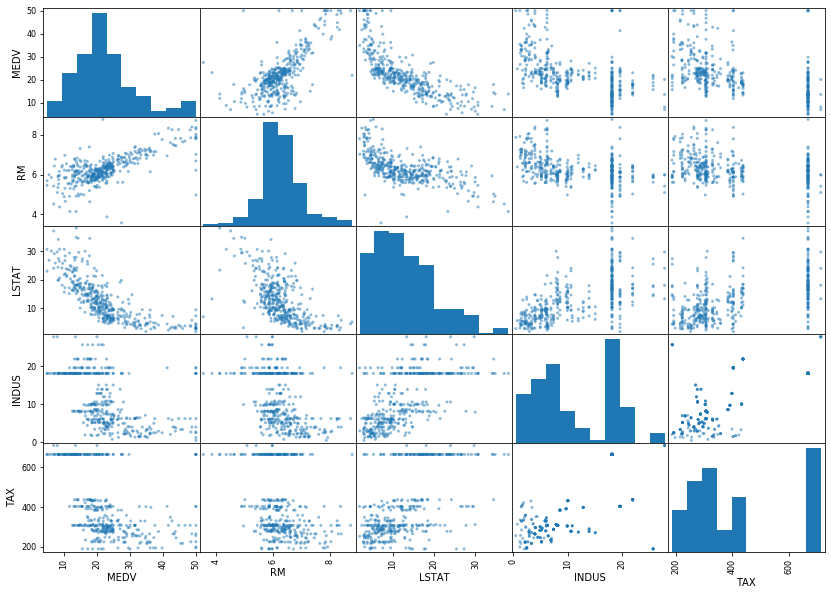

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "LSTAT", "INDUS", "TAX"]
scatter_matrix(boston_housing_pd[attributes], figsize=(14, 10))
plt.show()

## Data preparation

Normalize the train dataset:

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

boston_housing_tr = std_pipeline.fit_transform(X_train)

In [14]:
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train[0])]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [15]:
model = build_model()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


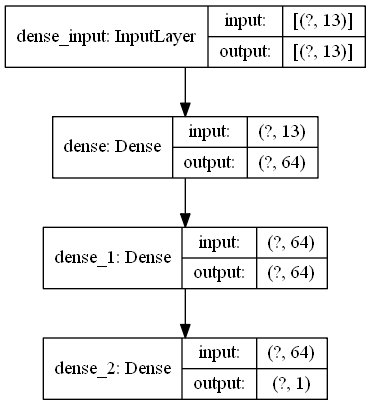

In [17]:
keras.utils.plot_model(model, "boston_housing_model.png", show_shapes=True)

In [18]:
example_batch = boston_housing_tr[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.27674806],
       [-0.6063423 ],
       [-0.32033604],
       [-0.27760237],
       [-0.44740632],
       [-0.10462617],
       [-0.16900717],
       [-0.3453472 ],
       [-0.3576376 ],
       [-0.08313523]], dtype=float32)

In [19]:
EPOCHS = 1000

history = model.fit(
  boston_housing_tr, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.641361,0.569987,0.641361,14.541793,2.942805,14.541793,995
996,0.789981,0.626667,0.789981,12.008850,2.704928,12.008850,996
997,0.682224,0.592725,0.682224,12.417548,2.788752,12.417547,997
998,0.651671,0.573373,0.651671,12.459139,2.721441,12.459139,998
999,0.739524,0.592209,0.739524,11.981846,2.689521,11.981846,999


Visualize MAE history:

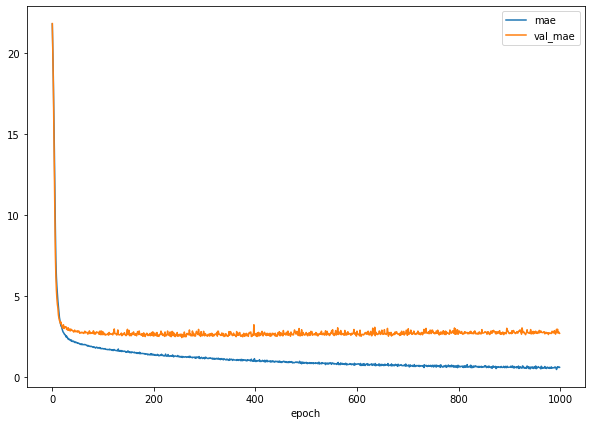

In [21]:
hist.plot(kind="line", x="epoch", y=["mae", "val_mae"], figsize=(10,7))
plt.show()

No need to train 1000 epochs, as no improvement after around 100 epochs:

In [22]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
  boston_housing_tr, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop])

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

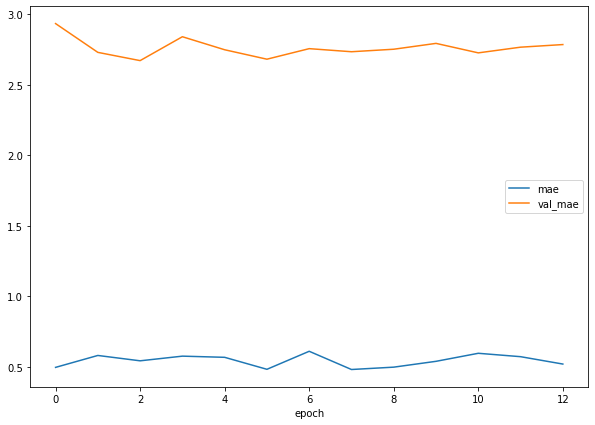

In [24]:
hist.plot(kind="line", x="epoch", y=["mae", "val_mae"], figsize=(10,7))
plt.show()

Evaluate **performance of the model** on the test set:

In [25]:
boston_housing_test_tr = std_pipeline.fit_transform(X_test)

loss, mae, mse = model.evaluate(boston_housing_test_tr, y_test, verbose=2)

102/102 - 0s - loss: 16.2856 - mae: 2.9675 - mse: 16.2856


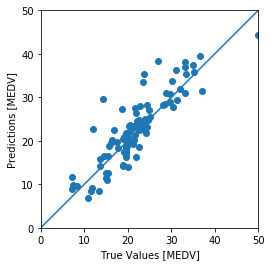

In [26]:
test_predict = model.predict(boston_housing_test_tr).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predict)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**Error distribution**:

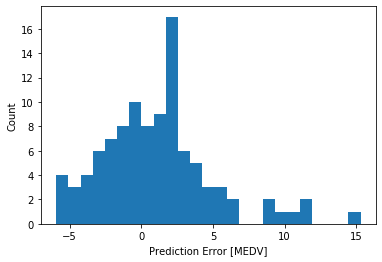

In [27]:
error = test_predict - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")

In [28]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

In [29]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2020_06_04-16_03_19'

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(
  boston_housing_tr, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, tensorboard_cb])

In [32]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 20252), started 0:04:18 ago. (Use '!kill 20252' to kill it.)